###Μηχανική Μάθηση
####2η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2023-24



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

### Εισαγωγή

Στην άσκηση αυτή θα εξερευνήσετε τεχνικές συσταδοποίησης και μείωσης διαστατικότητας σε εικόνες, ξεκινώντας από υπερφασματικά δεδομένα και προχωρώντας σε δεδομένα τηλεπισκόπησης.

- **Μέρος 1**: Θα χρησιμοποιήσετε τη μέθοδο συσταδοποίησης **k-means**, καθώς και την **fuzzy c-means**, σε συνδυασμό με τη μέθοδο μείωσης διαστατικότητας **PCA**, για την ανάλυση μιας υπερφασματικής εικόνας.

- **Μέρος 2**: Θα εργαστείτε με ένα σύνολο δεδομένων τηλεπισκόπησης και, με τη βοήθεια ενός προεκπαιδευμένου CNN, θα εξάγετε χαρακτηριστικά εικόνων για συσταδοποίηση, συγκρίνοντας τα αποτελέσματα με τη συσταδοποίηση με χρήση των pixels.

**Ονοματεπώνυμο φοιτητή: Πέππας Μιχαήλ - Αθανάσιος**

**Α.Μ.: 03121026**

### 1. Φόρτωση υπερφασματικής εικόνας και των επισημειώσεων της

Κατεβάστε την υπερφασματική εικόνα `salinas_image.npy` και τις αντίστοιχες επισημειώσεις `salinas_labels.npy` από το Google Drive:
https://drive.google.com/drive/folders/1DAKjz0IZkaorrHykD8R0KJctpMBRLqSs?usp=sharing

1.α. Φορτώστε την εικόνα και τις αντίστοιχες επισημειώσεις με χρήση της συνάρτησης np.load.

In [ ]:
import numpy as np

image = np.load('salinas_image.npy')
labels = np.load('salinas_labels.npy')

print(image.shape)
labels.shape

(512, 217, 204)


(512, 217)

Οι επισημειώσεις που φορτώσατε αντιστοιχούν κάθε πιξελ της υπερφασματικής εικόνας σε ένα τύπο από 16 διαφορετικές κατηγορίες:

```python
classes = [
    "Background",
    "Broccoli_green_weeds_1",
    "Broccoli_green_weeds_2",
    "Fallow",
    "Fallow_rough_plow",
    "Fallow_smooth",
    "Stubble",
    "Celery",
    "Grapes_untrained",
    "Soil_vineyard_develop",
    "Corn_senesced_green_weeds",
    "Lettuce_romaine_4wk",
    "Lettuce_romaine_5wk",
    "Lettuce_romaine_6wk",
    "Lettuce_romaine_7wk",
    "Vineyard_untrained",
    "Vineyard_vertical_trellis"
]
```

### 2. Οπτικοποίηση και Διερευνητική ανάλυση δεδομένων

Παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. Βρείτε το ύψος και το πλάτος της εικόνας, καθώς και τον αριθμό των υπερφασματικών καναλιών

2β. Σχεδιάστε με χρήση της matplotlib το 3ο, 65ο, και 95ο κανάλι της εικόνας στο ίδιο διάγραμμα

2γ. Υπολογίστε τον αριθμό των διαφορετικών κατηγοριών καλλιέργειας στις επισημειώσεις

2δ. Σχεδιάστε με χρήση της matplotlib τις επισημειώσεις. Προσθέστε επιπλέον επεξηγηματική λεζάντα με χρήση της βιβλιοθήκης κάθε επισημείωσης (χρησιμοποιήστε τη λίστα `classes` που σας δόθηκε προηγουμένως.)

2ε. Υπολογίστε πόσα pixel της εικόνας αντιστοιχούν σε κάθε επισημείωση.

**Ερώτημα 2α:  Ύψος, Πλάτος και #Υπερφασματικών Καναλιών**

In [ ]:
image = np.load('salinas_image.npy')
labels = np.load('salinas_labels.npy')

height = image.shape[0]
width = image.shape[1]
num_channels = image.shape[2]

print(f"Image Height: {height}")
print(f"Image Width: {width}")
print(f"Number of Hyperspectral Channels: {num_channels}")

Image Height: 512
Image Width: 217
Number of Hyperspectral Channels: 204


**Ερώτημα 2β: Σχεδιασμός 3ου, 65ου και 95ου καναλιού**

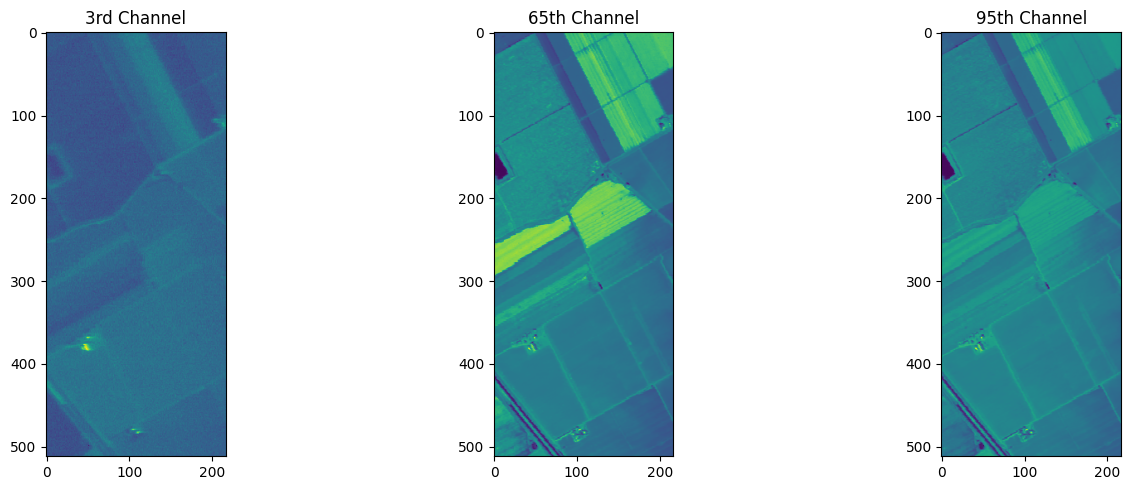

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image[:, :, 2])
plt.title('3rd Channel')

plt.subplot(1, 3, 2)
plt.imshow(image[:, :, 64])
plt.title('65th Channel')

plt.subplot(1, 3, 3)
plt.imshow(image[:, :, 94])
plt.title('95th Channel')

plt.tight_layout()
plt.show()

**Ερώτημα 2γ: #Διαφορετικών κατηγοριών καλλιέργειας στα labels**

In [ ]:
unique_labels = np.unique(labels)
num_classes = len(unique_labels)

print(f"Number of different crop categories in the labels: {num_classes}")

Number of different crop categories in the labels: 17


**Ερώτημα 2δ: Σχεδιασμός labels**

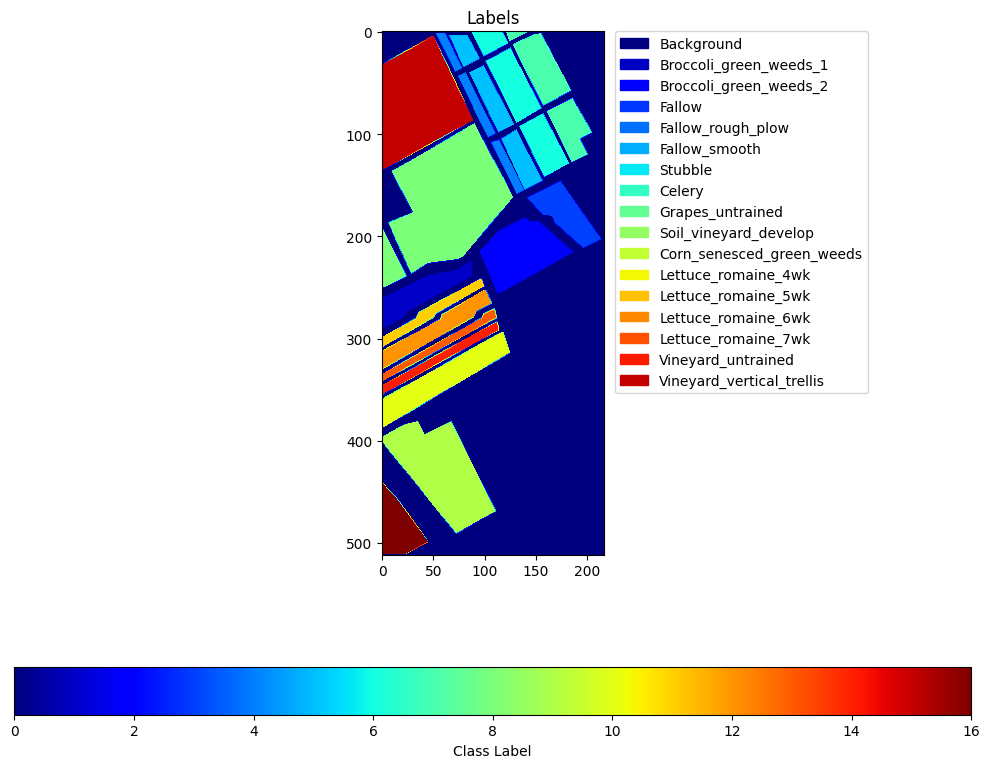

In [ ]:
import matplotlib.patches as mpatches

classes = [
    "Background",
    "Broccoli_green_weeds_1",
    "Broccoli_green_weeds_2",
    "Fallow",
    "Fallow_rough_plow",
    "Fallow_smooth",
    "Stubble",
    "Celery",
    "Grapes_untrained",
    "Soil_vineyard_develop",
    "Corn_senesced_green_weeds",
    "Lettuce_romaine_4wk",
    "Lettuce_romaine_5wk",
    "Lettuce_romaine_6wk",
    "Lettuce_romaine_7wk",
    "Vineyard_untrained",
    "Vineyard_vertical_trellis"
]

unique_labels = np.unique(labels)
plt.figure(figsize=(10, 8))
plt.imshow(labels, cmap='jet')
plt.colorbar(label='Class Label', orientation='horizontal')
plt.title('Labels')

# Add legend
handles = []
for label, class_name in zip(unique_labels, classes):
    handles.append(mpatches.Patch(color=plt.cm.jet(label / len(unique_labels)), label=class_name))

plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

**Ερώτημα 2ε: Υπολογισμός #pixels ανά label**

In [ ]:
pixel_counts = {}
for label in unique_labels:
    pixel_counts[label] = np.sum(labels == label)

for label, count in pixel_counts.items():
    print(f"Class {label} ({classes[label]}) : {count} pixels")

Class 0 (Background) : 56975 pixels
Class 1 (Broccoli_green_weeds_1) : 2009 pixels
Class 2 (Broccoli_green_weeds_2) : 3726 pixels
Class 3 (Fallow) : 1976 pixels
Class 4 (Fallow_rough_plow) : 1394 pixels
Class 5 (Fallow_smooth) : 2678 pixels
Class 6 (Stubble) : 3959 pixels
Class 7 (Celery) : 3579 pixels
Class 8 (Grapes_untrained) : 11271 pixels
Class 9 (Soil_vineyard_develop) : 6203 pixels
Class 10 (Corn_senesced_green_weeds) : 3278 pixels
Class 11 (Lettuce_romaine_4wk) : 1068 pixels
Class 12 (Lettuce_romaine_5wk) : 1927 pixels
Class 13 (Lettuce_romaine_6wk) : 916 pixels
Class 14 (Lettuce_romaine_7wk) : 1070 pixels
Class 15 (Vineyard_untrained) : 7268 pixels
Class 16 (Vineyard_vertical_trellis) : 1807 pixels


### 3. Εύρεση φασματικών υπογραφών

3.α. Μετατρέψτε την υπερφασματική εικόνα και τις επισημειώσεις σε μορφή κατάλληλη για περαιτέρω επεξεργασία. Η εικόνα θα πρέπει να μετατραπεί σε πίνακα N x Κ, όπου Ν τα pixel και K ο αριθμός των καναλιών. Οι επισημειώσεις αντίστοιχα θα πρέπει να μετατραπούν σε διάνυσμα μήκους Ν.

💡 Χρησιμοποιήστε την `numpy reshape`

In [ ]:
N = image.shape[0] * image.shape[1]
K = image.shape[2]

image_reshaped = image.reshape((N, K))
labels_reshaped = labels.reshape(N)

print("Total pixels: N = ", N)
print("Total channels: K = ", K)

print("\nReshaped image shape:", image_reshaped.shape)
print("Reshaped labels shape:", labels_reshaped.shape)

Total pixels: N =  111104
Total channels: K =  204

Reshaped image shape: (111104, 204)
Reshaped labels shape: (111104,)


3.β. Επιλέξτε ένα τυχαίο pixel της εικόνας από κάθε κατηγορία, και σχεδιάστε την υπερφασματική υπογραφή των επιλεγμένων πίξελ.

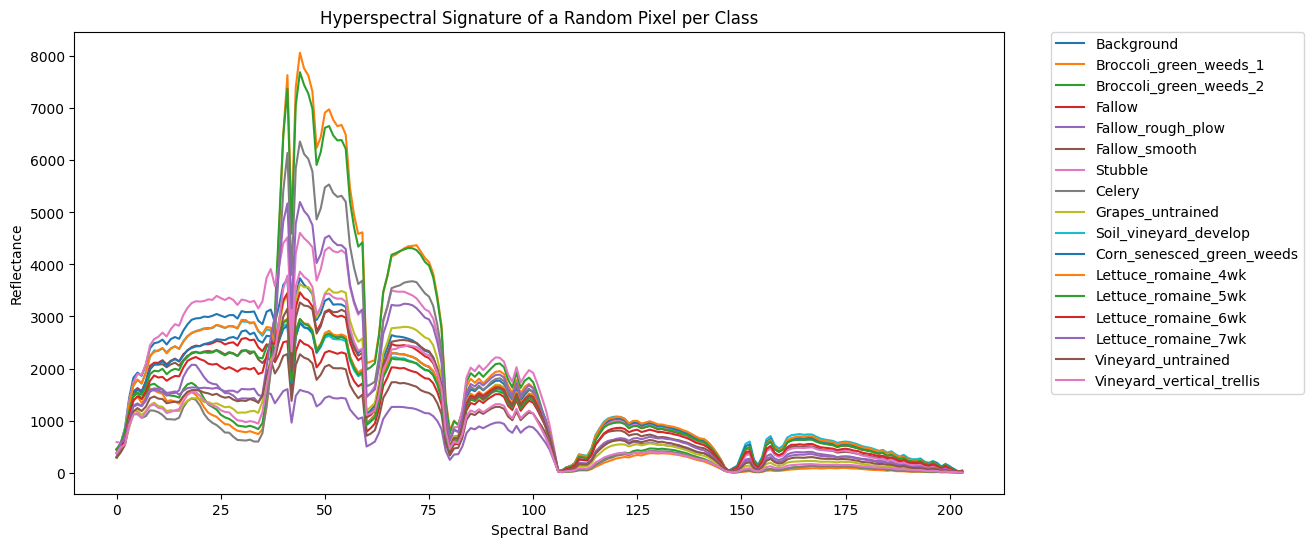

In [ ]:
import random

# Find indices of pixels belonging to each class
class_indices = {}
for class_label in unique_labels:
    class_indices[class_label] = np.where(labels_reshaped == class_label)[0]

# Select a random pixel from each class
random_pixels = {}
for class_label, indices in class_indices.items():
    if len(indices)>0:
      random_pixels[class_label] = random.choice(indices)

# Plot the hyperspectral signatures
plt.figure(figsize=(12, 6))
for class_label, pixel_index in random_pixels.items():
  plt.plot(image_reshaped[pixel_index, :], label=classes[class_label])

plt.xlabel('Spectral Band')
plt.ylabel('Reflectance')
plt.title('Hyperspectral Signature of a Random Pixel per Class')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

3.γ. Σημειώστε τις παρατηρήσεις σας και τα συμπεράσματα σας. Προσπαθήστε να απαντήσετε στις ακόλουθες ερωτήσεις:
    
* Με βάση τα προηγούμενα διαγράμματα θεωρείτε ότι κάποιες καλλιέργειες είναι πιο εύκολα διαχωρίσιμες από άλλες με βάση τη φασματική υπογραφή τους;
* Θεωρείτε ότι όλα τα κανάλια παρέχουν χρήσιμη πληροφορία για το διαχωρισμό;

**Θεωρία:** Το Reflectance (ανακλαστικότητα) είναι το ποσοστό της ακτινοβολίας που αντανακλάται από μια επιφάνεια σε σχέση με την ακτινοβολία που προσπίπτει σε αυτήν.

**1. Διαχωρισμός καλλιεργειών**

Από την εικόνα, παρατηρείται ότι ορισμένες καλλιέργειες εμφανίζουν διακριτές φασματικές υπογραφές σε συγκεκριμένες φασματικές ζώνες (π.χ. οι κατηγορίες Broccoli_green_weeds_1, Broccoli_green_weeds_2, και Lettuce_romaine_4wk παρουσιάζουν έντονες διακυμάνσεις).
Κάποιες κατηγορίες όπως το Stubble και Background έχουν πιο σταθερές ή παρόμοιες καμπύλες, γεγονός που δυσκολεύει τον διαχωρισμό τους.
Συνεπώς, καλλιέργειες με έντονες διαφορές στη φασματική υπογραφή (π.χ. στις περιοχές με υψηλή ανακλαστικότητα γύρω από τα 50-100 φασματικά κανάλια) είναι πιο εύκολα διαχωρίσιμες.

**2. Χρησιμότητα καναλιών**

Η ανακλαστικότητα σε ορισμένα φασματικά κανάλια (π.χ. κοντά στα 40-60) φαίνεται να προσφέρει σημαντική πληροφορία για τον διαχωρισμό, καθώς παρουσιάζονται έντονες διαφοροποιήσεις μεταξύ των κατηγοριών.
Αντίθετα, σε άλλες περιοχές (π.χ., μετά τα 150 φασματικά κανάλια), οι φασματικές υπογραφές συγκλίνουν και παρέχουν μικρότερη διαχωριστική πληροφορία.
Αυτό υποδηλώνει ότι δεν είναι όλα τα κανάλια εξίσου χρήσιμα για τον διαχωρισμό και μπορεί να είναι ωφέλιμη η μείωση της διαστατικότητας με τεχνικές όπως PCA ή επιλογή χαρακτηριστικών.

Ακόμα, παρατηερείται μια "κάπως περιοδική" συμπεριφορά του reflectance συναρτήσει των καναλιών (τα labels αποκλίνουν και συγκλίνουν περιοδικά), το οποίο επίσης υποδηλώνει πως υπάρχει πλεονάζουσα πληροφορία.

3.δ. Σχεδιάστε ένα heatmap, που να δείχνει τη συσχέτιση μεταξύ των διαφορετικών καναλιών.

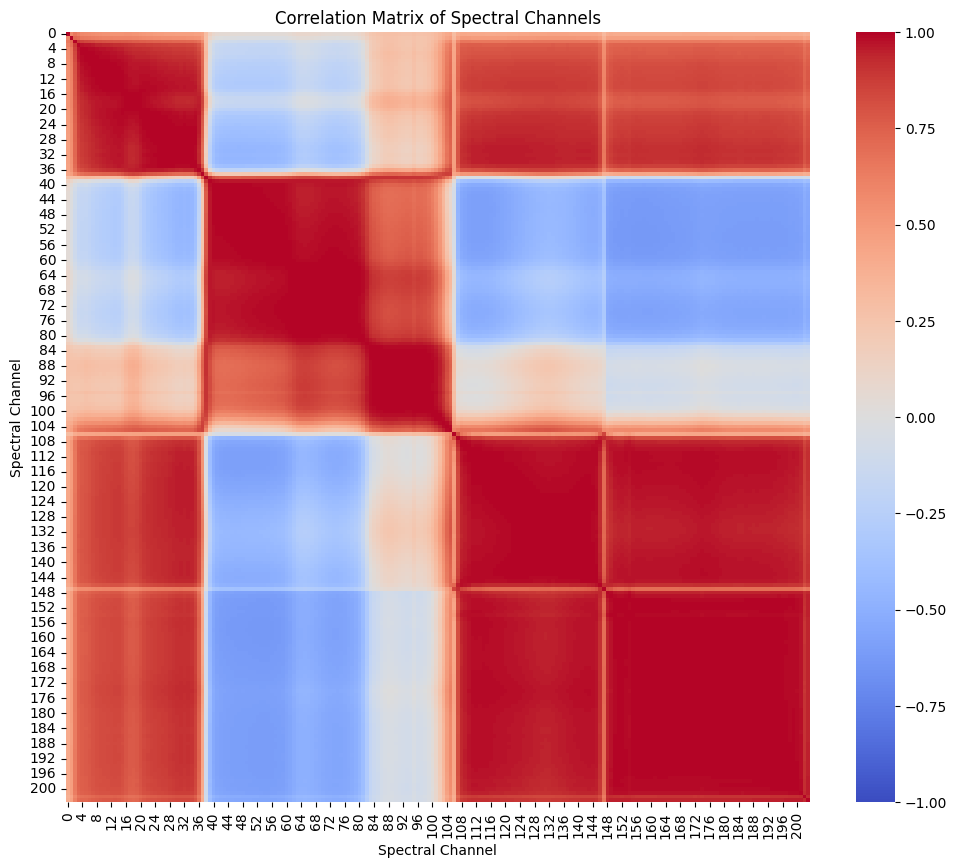

In [ ]:
import seaborn as sns

correlation_matrix = np.corrcoef(image_reshaped.T)

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Spectral Channels')
plt.xlabel('Spectral Channel')
plt.ylabel('Spectral Channel')
plt.show()

**1. Υψηλή Συσχέτιση (Κόκκινες περιοχές)**

Πολλά φασματικά κανάλια εμφανίζουν υψηλή θετική συσχέτιση (τιμές κοντά στο +1), κάτι που σημαίνει ότι περιέχουν πληροφορία παρόμοιας φύσης.
Αυτή η πληροφορία μπορεί να είναι πλεονάζουσα (redundant), καθώς κάποια φασματικά κανάλια παρέχουν σχεδόν τις ίδιες τιμές.

**2. Αρνητική Συσχέτιση (Μπλε περιοχές)**

Υπάρχουν περιοχές με αρνητική συσχέτιση (τιμές κοντά στο -1), κυρίως μεταξύ ομάδων καναλιών. Αυτό υποδηλώνει ότι κάποια κανάλια φέρουν αντίστροφη πληροφορία σε σχέση με άλλα.
Τέτοιες περιοχές μπορεί να είναι χρήσιμες για τον διαχωρισμό κατηγοριών ή αντικειμένων.

**3. Ασθενής Συσχέτιση (Λευκές περιοχές)**

Περιοχές με σχεδόν μηδενική συσχέτιση υποδεικνύουν ότι αυτά τα κανάλια δεν συσχετίζονται και πιθανώς φέρουν ανεξάρτητη πληροφορία.

### 4. Συσταδοποίηση με χρήση του αλγορίθμου KMeans

 4.α. Εφαρμόστε τον αλγόριθμο KMeans (sklearn.cluster) στα δεδομένα (εφόσον κάνατε την προεπεξεργασία του Βήματος 3). Χρησιμοποιήστε την τιμή `n_cluster=17`.

Αξιολογήστε την απόδοση του αλγορίθμου χρησιμοποιώντας τις ακόλουθες μετρικες:

* Adjusted Rand Index
* Silhouette Score

Ο Adjusted Rand Index (ARI) υπολογίζει πόσα ζεύγη σημείων ταξινομήθηκαν σωστά είτε στην ίδια συστάδα είτε σε διαφορετικές συστάδες χρησιμοποιώντας τις πραγματικές κατηγορίες, λαμβάνοντας υπόψη τυχαίες αντιστοιχίσεις. Έχει τιμές από -1 (πολύ κακή συσταδοποίηση) έως 1 (τέλεια ευθυγράμμιση με τις κατηγορίες), ενώ τιμή 0 υποδηλώνει τυχαία συσταδοποίηση. Είναι χρήσιμο για την αξιολόγηση της ακρίβειας σε δεδομένα με γνωστές κατηγορίες.

Αντιθέτως το  Silhouette Score μετρά πόσο καλά ένα σημείο δεδομένων ταιριάζει στη συστάδα του σε σχέση με τις υπόλοιπες συστάδες. Υπολογίζει τη μέση απόσταση ενός σημείου από τα υπόλοιπα σημεία της ίδιας συστάδας (cohesion) και τη μέση απόσταση από τα σημεία της πλησιέστερης άλλης συστάδας (separation). Το σκορ κυμαίνεται από -1 έως 1, όπου τιμές κοντά στο 1 υποδηλώνουν καλά ορισμένες συστάδες, τιμές κοντά στο 0 σημαίνουν αλληλοεπικαλυπτόμενες συστάδες, ενώ αρνητικές τιμές υποδεικνύουν κακή ανάθεση σε συστάδα.

Ο Silhouette Score είναι ένα μέτρο εσωτερικής αξιολόγησης, που εξετάζει τη συνοχή και τον διαχωρισμό των συστάδων χωρίς να λαμβάνει υπόψη πραγματικές κατηγορίες. Αντίθετα, ο Adjusted Rand Index (ARI) είναι μέτρο εξωτερικής αξιολόγησης, που συγκρίνει τις συστάδες με τις πραγματικές κατηγορίες (ground truth). Η χρήση και των δύο μαζί παρέχει μια συνολική εικόνα της ποιότητας της συσταδοποίησης.

**Θεωρία**

Ο KMeans είναι ένας αλγοριθμικός τρόπος συσταδοποίησης (clustering) που χρησιμοποιείται για τη διαίρεση δεδομένων σε
k ομάδες (clusters), με βάση την ομοιότητά τους. Είναι ένας μη επιβλεπόμενος αλγόριθμος, καθώς δεν χρησιμοποιεί επισημειώσεις (labels).

**Βήματα λειτουργίας του KMeans**

1. Αρχικοποίηση: Ορίζουμε τον αριθμό των συστάδων.
Επιλέγονται 𝑘 τυχαία σημεία ως αρχικά κεντροειδή (centroids).

2. Εκχώρηση σε συστάδες: Κάθε σημείο δεδομένων ανατίθεται στο πλησιέστερο κεντροειδές, χρησιμοποιώντας μία μετρική απόστασης (π.χ. Ευκλείδεια απόσταση).

3. Ενημέρωση κεντροειδών: Επαναϋπολογίζονται τα κεντροειδή ως ο μέσος όρος των σημείων που ανήκουν σε κάθε cluster.

4. Επανάληψη: Τα βήματα 2 και 3 επαναλαμβάνονται μέχρι τα κεντροειδή να μην αλλάζουν σημαντικά ή να επιτευχθεί ο μέγιστος αριθμός επαναλήψεων.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
import time

start_time = time.time()

# Apply KMeans clustering
kmeans = KMeans(n_clusters=17, random_state=0)
kmeans_labels = kmeans.fit_predict(image_reshaped)

# Evaluate the clustering performance
ari = adjusted_rand_score(labels_reshaped, kmeans_labels)
silhouette = silhouette_score(image_reshaped, kmeans_labels)

# Calculate the runtime
end_time = time.time()
runtime = end_time - start_time

print(f"Number of clusters: {kmeans.n_clusters}")
print(f"Iterations to converge: {kmeans.n_iter_}")

print(f"\nAdjusted Rand Index (ARI): {ari}")
print(f"Silhouette Score: {silhouette}")

print(f"\nRuntime: {runtime:.2f} seconds")

Number of clusters: 17
Iterations to converge: 60

Adjusted Rand Index (ARI): 0.14285393517763426
Silhouette Score: 0.40339775554605456

Runtime: 360.06 seconds


4.β. Χρησιμοποιώντας τα αποτελέσματα της συσταδοποίησης, σχεδιάστε πάλι με χρήση της matplotlib την ταξινόμηση σε μορφή εικόνας, χρησιμοποιώντας για κάθε pixel τη συστάδα στην οποία έχει ανατεθεί.

Συγκρίνετε με την αρχική εικόνα των επισημειώσεων. Τι παρατηρείτε;

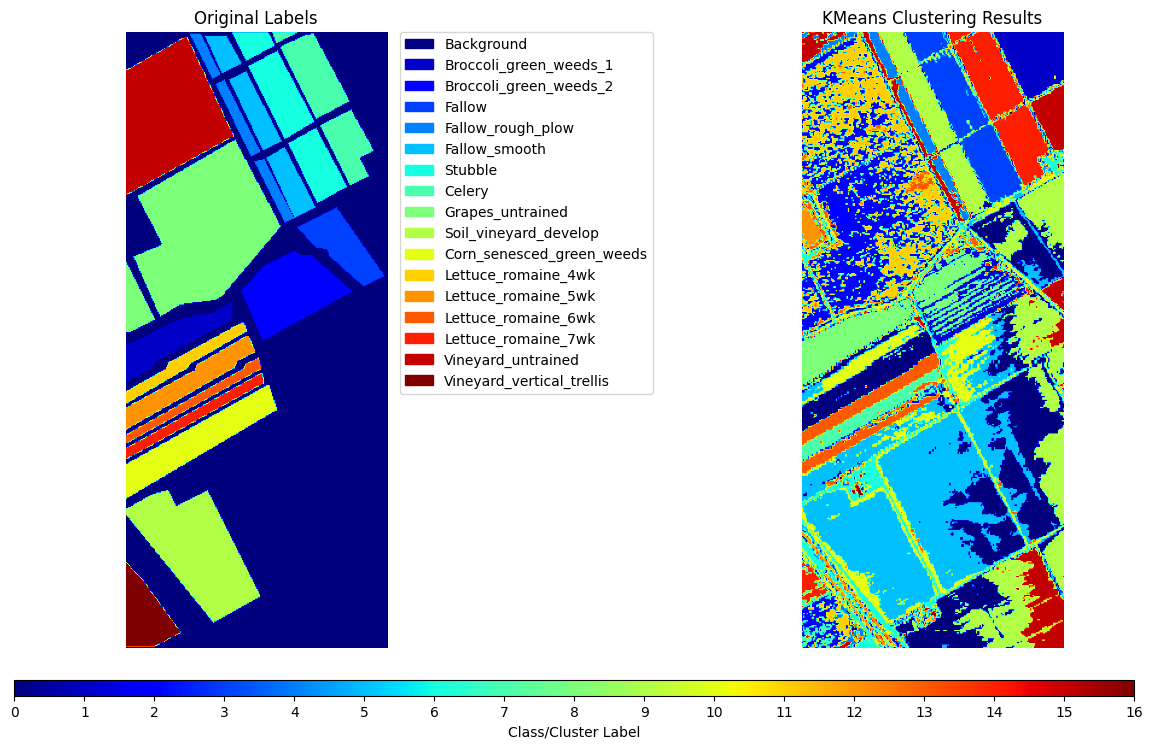

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Class names for legend
classes = [
    "Background",
    "Broccoli_green_weeds_1",
    "Broccoli_green_weeds_2",
    "Fallow",
    "Fallow_rough_plow",
    "Fallow_smooth",
    "Stubble",
    "Celery",
    "Grapes_untrained",
    "Soil_vineyard_develop",
    "Corn_senesced_green_weeds",
    "Lettuce_romaine_4wk",
    "Lettuce_romaine_5wk",
    "Lettuce_romaine_6wk",
    "Lettuce_romaine_7wk",
    "Vineyard_untrained",
    "Vineyard_vertical_trellis"
]

# Reshape KMeans labels back to original image shape
kmeans_image = kmeans_labels.reshape(labels.shape)
unique_labels = np.unique(labels)

# Plot Original Labels and KMeans Results Side by Side
fig, axes = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [1, 1]})

# Common color range from 0 to 16
vmin, vmax = 0, 16

# Plot Original Labels
im1 = axes[0].imshow(labels, cmap='jet', vmin=vmin, vmax=vmax)
axes[0].set_title('Original Labels')
axes[0].axis('off')

# Add legend for original labels
handles = [
    mpatches.Patch(color=plt.cm.jet(label / (vmax)), label=class_name)
    for label, class_name in zip(range(17), classes)
]
axes[0].legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Plot KMeans Clustering Results
im2 = axes[1].imshow(kmeans_image, cmap='jet', vmin=vmin, vmax=vmax)
axes[1].set_title('KMeans Clustering Results')
axes[1].axis('off')

# Add a separate colorbar below both images
cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(im1, cax=cbar_ax, orientation='horizontal', ticks=range(vmin, vmax + 1))
cbar.set_label('Class/Cluster Label')

plt.show()

**Παρατηρήσεις**

**1. Συμφωνία και Διαχωρισμός**

Ο αλγόριθμος KMeans έχει καταφέρει να εντοπίσει κάποιες περιοχές που αντιστοιχούν στις πραγματικές κατηγορίες.
Ωστόσο, η ταξινόμηση δεν είναι τέλεια. Υπάρχουν περιοχές όπου κάποιες κατηγορίες συγχέονται και ανατίθενται στο ίδιο cluster.
Μικρά "θορυβώδη" clusters εμφανίζονται σε περιοχές που είναι ενιαίες στην πραγματική εικόνα.

**2. Διαχωριστική Ικανότητα**

Ο KMeans δυσκολεύεται να διαχωρίσει περιοχές με παρόμοιες φασματικές υπογραφές (π.χ., Lettuce_romaine_4wk, Lettuce_romaine_5wk).
Καλύτερα αποτελέσματα παρατηρούνται σε περιοχές με έντονες διαφορές στην ανακλαστικότητα, όπως μεταξύ Soil και Vineyard.

**3. Περιορισμοί του KMeans**

Ο KMeans υποθέτει σφαιρικά clusters και χρησιμοποιεί την Ευκλείδεια απόσταση, κάτι που δεν είναι πάντα ιδανικό για φασματικά δεδομένα.
Ο θόρυβος και οι μικρές διαφορές μεταξύ κατηγοριών οδηγούν σε ανακρίβειες.

4.γ. Εφαρμογή του αλγορίθμου Fuzzy C-Means

Ο αλγόριθμος **Fuzzy C-Means** δεν περιλαμβάνεται στο scikit-learn, αλλά μπορούμε να τον εφαρμόσουμε χρησιμοποιώντας τη βιβλιοθήκη `fcmeans`.

#### **Βήμα 1: Εγκατάσταση της βιβλιοθήκης**
Πρώτα, εγκαταστήστε τη βιβλιοθήκη `fcmeans` εκτελώντας την παρακάτω εντολή σε ένα κελί:

```bash
!pip install fuzzy-c-means
```

#### Βήμα 2: Εκτέλεση του αλγορίθμου
Η fcmeans παρέχει λειτουργικότητα αντίστοιχη με τον τρόπο εκπαίδευσης του scikit-learn, επιτρέποντας εύκολη ενσωμάτωση στη ροή εργασιών σας.

Για περισσότερες πληροφορίες σχετικά με τη χρήση της βιβλιοθήκης, δείτε το documentation: https://fuzzy-c-means.readthedocs.io/en/latest/

Υπολογίστε πάλι το Silhouette Score και το ARI και συγκρίνετε με τις προηγούμενες μεθόδους.

Note. Ο αλγόριθμος θα τρέξει περίπου 15 λεπτά.

**Θεωρία**

Ο Fuzzy C-Means είναι ένας αλγόριθμος συσταδοποίησης που βασίζεται στην αρχή της ασαφούς λογικής (fuzzy logic). Σε αντίθεση με τον KMeans, όπου κάθε σημείο δεδομένων ανήκει αποκλειστικά σε ένα cluster, ο Fuzzy C-Means επιτρέπει σε κάθε σημείο να ανήκει μερικώς σε περισσότερα από ένα clusters, με έναν βαθμό συμμετοχής (membership degree).

**Βασική Ιδέα**

Ο FCM αναθέτει σε κάθε σημείο δεδομένων έναν βαθμό συμμετοχής (u_ij) σε κάθε cluster, ο οποίος δείχνει πόσο πιθανό είναι το σημείο να ανήκει σε αυτό το cluster. Ο βαθμός συμμετοχής κυμαίνεται από 0 έως 1 και το άθροισμα των βαθμών συμμετοχής για κάθε σημείο είναι πάντα 1.

**Διαδικασία του Fuzzy C-Means**

1. Αρχικοποίηση: Ορίζουμε τον αριθμό των clusters και αρχικοποιούμε τυχαία τον πίνακα βαθμών συμμετοχής.

2. Υπολογισμός Κεντροειδών: Τα κεντροειδή κάθε cluster υπολογίζονται ως ο σταθμισμένος μέσος όρος των σημείων δεδομένων με βάρη τους βαθμούς συμμετοχής.

3. Ενημέρωση Βαθμών Συμμετοχής: Ενημερώνουμε τον βαθμό συμμετοχής για κάθε σημείο και cluster, χρησιμοποιώντας την απόσταση μεταξύ του σημείου και του κεντροειδούς.

4. Σύγκλιση: Η διαδικασία επαναλαμβάνεται μέχρι τα κεντροειδή και οι βαθμοί συμμετοχής να μην αλλάζουν σημαντικά.


**Βήμα 1: Εγκατάσταση της βιβλιοθήκης**

In [ ]:
!pip install fuzzy-c-means

**Βήμα 2: Εκτέλεση του αλγορίθμου**

FCM Adjusted Rand Index: 0.12730646806016094
FCM Silhouette Score: 0.34903976915709883

FCM Runtime: 898.19 seconds



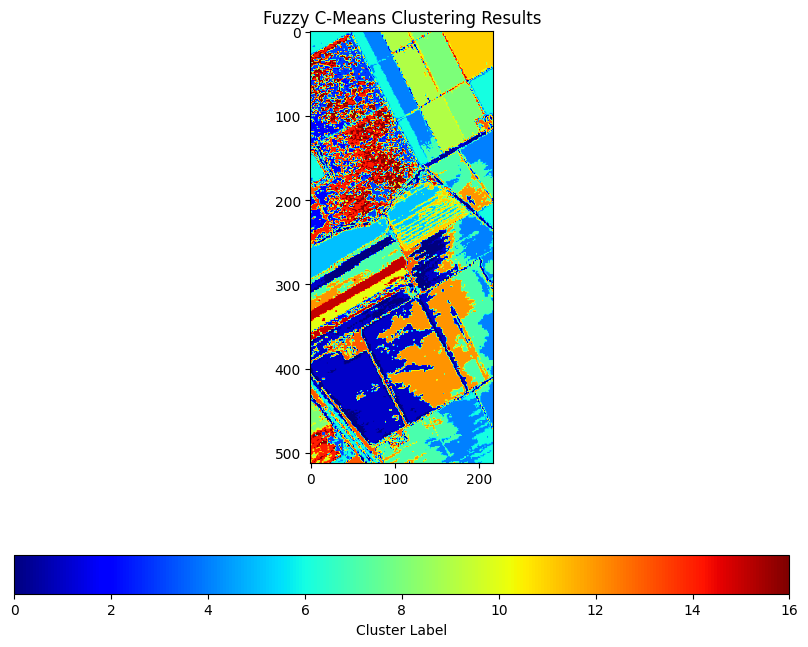

In [ ]:
from fcmeans import FCM
from sklearn.metrics import adjusted_rand_score, silhouette_score
import time
import matplotlib.pyplot as plt

start_time = time.time()

# Apply Fuzzy C-Means clustering
fcm = FCM(n_clusters=17, random_state=0)
fcm.fit(image_reshaped)
fcm_labels = fcm.predict(image_reshaped)

# Evaluate the clustering performance
ari_fcm = adjusted_rand_score(labels_reshaped, fcm_labels)
silhouette_fcm = silhouette_score(image_reshaped, fcm_labels)

# Calculate the runtime
end_time = time.time()
runtime = end_time - start_time

# Print results
print(f"FCM Adjusted Rand Index: {ari_fcm}")
print(f"FCM Silhouette Score: {silhouette_fcm}")
print(f"\nFCM Runtime: {runtime:.2f} seconds\n")

# Reshape fcm_labels back to the original image shape
fcm_image = fcm_labels.reshape(labels.shape)

# Plot the clustered image
plt.figure(figsize=(10, 8))
plt.imshow(fcm_image, cmap='jet')
plt.colorbar(label='Cluster Label', orientation='horizontal')
plt.title('Fuzzy C-Means Clustering Results')
plt.show()

### 5. Μείωση διαστατικότητας δεδομένων

**Θεωρία**

Η PCA (Ανάλυση Κύριων Συνιστωσών) είναι μια τεχνική μείωσης διαστατικότητας που χρησιμοποιείται για να μειωθεί ο αριθμός των χαρακτηριστικών (features) ενός συνόλου δεδομένων, διατηρώντας ταυτόχρονα όσο το δυνατόν περισσότερη πληροφορία. Είναι μια γραμμική μέθοδος που μετασχηματίζει τα δεδομένα σε ένα νέο σύνολο αξόνων που ονομάζονται κύριες συνιστώσες (principal components).

**Στόχος του PCA**

Να βρει έναν νέο σύνολο αξόνων που ελαχιστοποιούν την απώλεια πληροφορίας.
Οι άξονες αυτοί είναι κάθετοι μεταξύ τους (ορθογώνιοι) και ταξινομούνται με βάση τη διακύμανση που εξηγούν.

**Πλεονεκτήματα του PCA**

1. Μείωση διαστατικότητας: Μειώνει τον αριθμό των χαρακτηριστικών, επιταχύνοντας τη διαδικασία ανάλυσης.
2. Οπτικοποίηση δεδομένων: Επιτρέπει την απεικόνιση υψηλών διαστάσεων δεδομένων σε 2D ή 3D.

**Μειονεκτήματα του PCA**

1. Γραμμικότητα: Το PCA υποθέτει γραμμικές σχέσεις και δεν είναι ιδανικό για μη γραμμικά δεδομένα.
2. Απώλεια πληροφορίας: Αν επιλεγούν λίγες συνιστώσες, μπορεί να χαθεί πληροφορία.
3. Δυσκολία Ερμηνείας: Οι νέες συνιστώσες δεν έχουν άμεση σημασιολογική ερμηνεία.

5.α. Εφαρμόστε στα δεδομένα τη μέθοδο μείωσης διαστατικότητας PCA. Επιλέξτε `n_components=3`

PCA result shape: (111104, 3) => RGB image.

Visualization of the first three components as an RGB image:



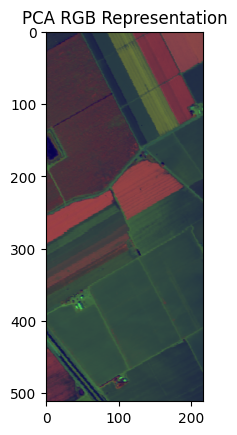

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA with n_components=3
pca = PCA(n_components=3)
pca_result = pca.fit_transform(image_reshaped)

print("PCA result shape:", pca_result.shape, "=> RGB image.")

print("\nVisualization of the first three components as an RGB image:\n")
pca_image = pca_result.reshape((labels.shape[0], labels.shape[1], 3))
plt.imshow((pca_image - pca_image.min()) / (pca_image.max() - pca_image.min()))
plt.title('PCA RGB Representation')
plt.show()

5.β. Τι ποσοστό της διακύμανσης των δεδομένων διατηρείτε με `n_components=3` ?
Hint: sklearn.decomposition.PCA.explained_variance_ratio_

**Θεωρία**

Στο PCA, το ποσοστό διακύμανσης που διατηρείται από τις επιλεγμένες κύριες συνιστώσες (principal components) είναι μία κρίσιμη ένδειξη της ποιότητας της μείωσης διαστατικότητας. Η διακύμανση αναφέρεται στην πληροφορία που εξηγούν οι κύριες συνιστώσες για τα αρχικά δεδομένα.

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
total_variance_ratio = np.sum(explained_variance_ratio)

# Display results
print("Explained Variance Ratio for each component:")
for i, variance in enumerate(explained_variance_ratio, start=1):
    print(f"Component {i}: {variance * 100:.2f}%")

print(f"\nTotal Variance Retained with n_components = {len(explained_variance_ratio)}: {total_variance_ratio * 100:.2f}%")

Explained Variance Ratio for each component:
Component 1: 74.47%
Component 2: 23.53%
Component 3: 1.13%

Total Variance Retained with n_components = 3: 99.14%


### 6. Συνδυασμός μείωσης διαστατικότητας και kmeans

6.α. Εφαρμόστε τον αλγόριθμο kmeans στα δεδομένα μειωμένης διαστατικότητας `n_components=3`, και υπολογίστε εκ νέου τις μετρικές. Τι συμπεράσματα βγάζετε;

6.β. Δοκιμάστε διαφορετικές τιμές για το n_components (από 1 έως 5) και τρέχτε εκ νέου κάθε φορα τον k-means, υπολογίζοντας τα τελικά score. Για κάθε μετρική, φτιάχτε ένα διάγραμμα που στον άξονα των Χ θα έχει τον αριθμό n_components και στον άξονα των Υ, την τιμή της μετρικής. Τι συμπεράσματα βγάζετε;

**Ερώτημα 6α - Αλγόριθμος**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
import time

start_time = time.time()

# Apply KMeans clustering to the PCA-reduced data
kmeans_pca = KMeans(n_clusters=17, random_state=0)
kmeans_pca_labels = kmeans_pca.fit_predict(pca_result)

# Evaluate the clustering performance
ari_pca = adjusted_rand_score(labels_reshaped, kmeans_pca_labels)
silhouette_pca = silhouette_score(pca_result, kmeans_pca_labels)

# Calculate the runtime
end_time = time.time()
runtime = end_time - start_time

print(f"Number of clusters: {kmeans_pca.n_clusters}")
print(f"Iterations to converge: {kmeans_pca.n_iter_}")

print(f"\nPCA-reduced Adjusted Rand Index: {ari_pca}")
print(f"PCA-reduced Silhouette Score: {silhouette_pca}")

print(f"\nPCA-reduced KMeans Runtime: {runtime:.2f} seconds")

Number of clusters: 17
Iterations to converge: 20

PCA-reduced Adjusted Rand Index: 0.16638098390173864
PCA-reduced Silhouette Score: 0.43644318582362884

PCA-reduced KMeans Runtime: 170.18 seconds


**Ερώτημα 6α - Συμπεράσματα**

**1. Βελτίωση Μετρικών Απόδοσης**

Το Adjusted Rand Index (ARI) αυξήθηκε από 0.1428 σε 0.1664.
Αυτό δείχνει μια ελαφρά βελτίωση στην ικανότητα του KMeans να αντιστοιχίζει τα clusters με τις πραγματικές κατηγορίες. Το Silhouette Score αυξήθηκε από 0.4034 σε 0.4364, το οποίο υποδεικνύει καλύτερη συνοχή εντός των clusters και μεγαλύτερη απόσταση από γειτονικά clusters.

**2. Μείωση Επαναλήψεων και Χρόνου Εκτέλεσης**

Οι επαναλήψεις για τη σύγκλιση μειώθηκαν από 60 σε 20, ενώ ο χρόνος εκτέλεσης μειώθηκε σχεδόν στο μισό (από 360.06 δευτερόλεπτα σε 170.18 δευτερόλεπτα). Η χρήση του PCA με n_components=3 μείωσε τη διαστατικότητα των δεδομένων, με αποτέλεσμα:
1. Ταχύτερη σύγκλιση του αλγορίθμου KMeans
2. Μειωμένες υπολογιστικές απαιτήσεις.

**3. Αιτιολόγηση των Αποτελεσμάτων**

Το PCA με n_components=3 διατήρησε μεγάλο ποσοστό της διακύμανσης των δεδομένων, επιτρέποντας στο KMeans να λειτουργήσει με λιγότερες διαστάσεις, χωρίς να χάσει σημαντική πληροφορία. Οι βελτιωμένες μετρικές δείχνουν ότι η μείωση διαστατικότητας βοήθησε στην καλύτερη διάκριση των clusters.

**4. Πλεονεκτήματα από τη Χρήση του PCA**

1. Ταχύτερη εκτέλεση
2. Βελτιωμένη ακρίβεια (ARI και Silhouette Score)
3. Αφαίρεση πλεονάζουσας πληροφορίας και θορύβου από τα δεδομένα.

**Ερώτημα 6β - Αλγόριθμος**

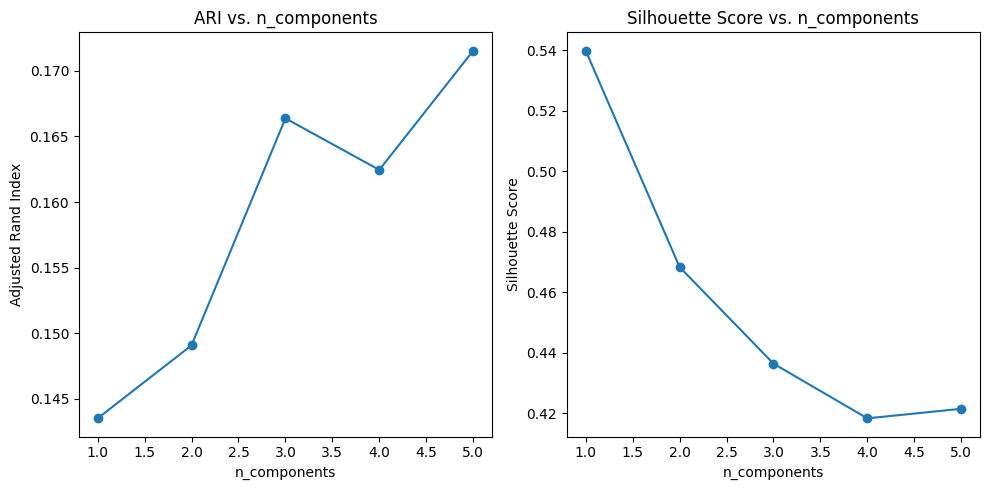

In [ ]:
# Store the results
n_components_values = []
ari_scores = []
silhouette_scores = []

for n_components in range(1, 6):
    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(image_reshaped)

    # Apply KMeans
    kmeans_pca = KMeans(n_clusters=17, random_state=0)
    kmeans_pca_labels = kmeans_pca.fit_predict(pca_result)

    # Calculate metrics
    ari = adjusted_rand_score(labels_reshaped, kmeans_pca_labels)
    silhouette = silhouette_score(pca_result, kmeans_pca_labels)

    # Store results
    n_components_values.append(n_components)
    ari_scores.append(ari)
    silhouette_scores.append(silhouette)

# Plot the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(n_components_values, ari_scores, marker='o')
plt.xlabel('n_components')
plt.ylabel('Adjusted Rand Index')
plt.title('ARI vs. n_components')

plt.subplot(1, 2, 2)
plt.plot(n_components_values, silhouette_scores, marker='o')
plt.xlabel('n_components')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. n_components')

plt.tight_layout()
plt.show()

**Ερώτημα 6β - Συμπεράσματα**

**1. Adjusted Rand Index (ARI)**

Το ARI βελτιώνεται σταδιακά καθώς το n_components αυξάνεται.
Σημαντική βελτίωση παρατηρείται από n_components=2 σε n_components=3, ενώ η αύξηση συνεχίζεται, με το καλύτερο ARI να επιτυγχάνεται σε n_components=5. Αυτό δείχνει ότι η διατήρηση περισσότερων κύριων συνιστωσών επιτρέπει στο KMeans να αναγνωρίζει καλύτερα τη δομή των δεδομένων.

**2. Silhouette Score**

Αντίθετα, το Silhouette Score μειώνεται καθώς το n_components αυξάνεται. Η υψηλότερη τιμή παρατηρείται όταν n_components=1 και στη συνέχεια η απόδοση επιδεινώνεται όσο αυξάνονται οι συνιστώσες. Το Silhouette Score υποδεικνύει ότι, με λιγότερες διαστάσεις, τα δεδομένα γίνονται πιο συμπαγή εντός των clusters και καλύτερα διαχωρισμένα από γειτονικά clusters.

**Συνολικό Συμπέρασμα**

Υπάρχει αντίστροφη σχέση μεταξύ ARI και Silhouette Score.
Για n_components = 3, παρατηρείται μια καλή ισορροπία, καθώς το ARI είναι αρκετά υψηλό, ενώ το Silhouette Score δεν έχει μειωθεί σημαντικά. Η επιλογή του n_components εξαρτάται από την προτεραιότητα της ανάλυσης:

1. Αν ο στόχος είναι η ακρίβεια των clusters (υψηλό ARI), επιλέγουμε μεγαλύτερο n_components
2. Αν ο στόχος είναι η συνοχή και διαχωριστικότητα των clusters (υψηλό Silhouette Score), επιλέγουμε μικρότερο n_components.

# Μέρος 2: Χρήση προεκπαιδευμένου CNN για συσταδοποίηση

Σε αυτό το μέρος, θα χρησιμοποιήσουμε τη βιβλιοθήκη **Keras**, η οποία παρέχει εύκολη ενσωμάτωση προεκπαιδευμένων μοντέλων CNN και ευκολία στη διαχείριση δεδομένων. Στόχος μας είναι να αναδείξουμε τη δύναμη των χαρακτηριστικών που εξάγονται από προεκπαιδευμένα CNN (Convolutional Neural Networks) για τη συσταδοποίηση δεδομένων τηλεπισκόπησης.

Θα χρησιμοποιήσουμε ένα υποσύνολο από το σύνολο δεδομένων **EuroSAT**, το οποίο αποτελείται από δορυφορικές εικόνες κατανεμημένες σε 10 κατηγορίες (π.χ., καλλιέργειες, δάση, αστικές περιοχές). Τα χαρακτηριστικά που θα εξάγουμε από ένα προεκπαιδευμένο CNN θα χρησιμοποιηθούν για την ομαδοποίηση των εικόνων.

---

## 1. Φόρτωση του συνόλου δεδομένων

Για τους σκοπούς αυτής της άσκησης, θα χρησιμοποιήσουμε το σύνολο δεδομένων **EuroSAT**. Το EuroSAT περιλαμβάνει δορυφορικές εικόνες οργανωμένες σε φακέλους κατά κατηγορία.

---

### 1.α. Κατέβασμα και αποσυμπίεση του EuroSAT

Το EuroSAT δεν υποστηρίζεται απευθείας από το Keras, αλλά μπορείτε να το κατεβάσετε και να το αποσυμπιέσετε με τις παρακάτω εντολές:

```bash
# Κατέβασμα του EuroSAT
!wget https://madm.dfki.de/files/sentinel/EuroSAT.zip --no-check-certificate

# Αποσυμπίεση του αρχείου
!unzip EuroSAT.zip
```

### 1.β. Ενσωμάτωση του Keras μέσω TensorFlow
Η βιβλιοθήκη Keras είναι ενσωματωμένη στο TensorFlow. Για να τη χρησιμοποιήσετε, πρέπει να εισάγετε τη βιβλιοθήκη TensorFlow και να χρησιμοποιήσετε τις κλάσεις της Keras μέσω του tensorflow.keras.

Παρακάτω φαίνεται πώς να φορτώσετε το EuroSAT χρησιμοποιώντας το ImageDataGenerator:


In [ ]:
# !wget https://madm.dfki.de/files/sentinel/EuroSAT.zip --no-check-certificate
# ! unzip EuroSAT.zip

import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

data_dir = os.path.join('2750')
print(f'Τα δεδομένα βρίσκονται στο: {data_dir}')

# Κανονικοποίηση και φόρτωση των δεδομένων
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.90  # φορτώνουμε ένα μικρό μέρος από κάθε κλάση για γρηγορότερα τρεξίματα θέτοντας μεγάλο validation percentage και φορτώνοντας το training
)

dataset = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224), # το mobilenetv3 δέχεται εικόνες μεγέθους 224 x 224
    batch_size=1, # κάθε κλήση του iterator φορτώνει ένα ζεύγος image - label
    shuffle=False,
    subset='training'
)

print(f'Φορτώθηκαν {len(dataset) * dataset.batch_size} εικόνες.')


**Θεωρία**

Το CNN (Convolutional Neural Network) είναι ένας τύπος νευρωνικού δικτύου που χρησιμοποιείται κυρίως για επεξεργασία εικόνων και δεδομένων με χωρική δομή. Τα CNN είναι εξαιρετικά αποτελεσματικά στην εξαγωγή χαρακτηριστικών και στην κατανόηση μοτίβων από εικόνες, καθώς αξιοποιούν τη συνελικτική λειτουργία (convolution) για να ανιχνεύσουν τοπικά χαρακτηριστικά και φέρουν την πολύ σημαντική ιδιότητα της μεταφορικής αμεταβλητότητας.

**Ερώτημα 1α: Κατέβασμα και Αποσυμπίεση του EuroSAT**

In [2]:
# Κατέβασμα του EuroSAT
!wget https://madm.dfki.de/files/sentinel/EuroSAT.zip --no-check-certificate

# Αποσυμπίεση του αρχείου
!unzip EuroSAT.zip

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
  inflating: 2750/SeaLake/SeaLake_2206.jpg  
  inflating: 2750/SeaLake/SeaLake_1313.jpg  
  inflating: 2750/SeaLake/SeaLake_263.jpg  
  inflating: 2750/SeaLake/SeaLake_967.jpg  
  inflating: 2750/SeaLake/SeaLake_515.jpg  
  inflating: 2750/SeaLake/SeaLake_1465.jpg  
  inflating: 2750/SeaLake/SeaLake_1817.jpg  
  inflating: 2750/SeaLake/SeaLake_2902.jpg  
  inflating: 2750/SeaLake/SeaLake_2570.jpg  
  inflating: 2750/SeaLake/SeaLake_1004.jpg  
  inflating: 2750/SeaLake/SeaLake_174.jpg  
  inflating: 2750/SeaLake/SeaLake_2111.jpg  
  inflating: 2750/SeaLake/SeaLake_2388.jpg  
  inflating: 2750/SeaLake/SeaLake_1948.jpg  
  inflating: 2750/SeaLake/SeaLake_838.jpg  
  inflating: 2750/SeaLake/SeaLake_2738.jpg  
  inflating: 2750/SeaLake/SeaLake_1999.jpg  
  inflating: 2750/SeaLake/SeaLake_2359.jpg  
  inflating: 2750/SeaLake/SeaLake_2660.jpg  
  inflating: 2750/SeaLake/SeaLake_1775.jpg  
  inflating: 2750/SeaLake/SeaLake_605.jpg  
  infl

**Ερώτημα 1β: Ενσωμάτωση του Keras μέσω TensorFlow**

In [3]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

data_dir = os.path.join('2750')
print(f'Τα δεδομένα βρίσκονται στο: {data_dir}')

# Κανονικοποίηση και φόρτωση των δεδομένων
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.90  # φορτώνουμε ένα μικρό μέρος από κάθε κλάση για γρηγορότερα τρεξίματα θέτοντας μεγάλο validation percentage και φορτώνοντας το training
)

dataset = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224), # το mobilenetv3 δέχεται εικόνες μεγέθους 224 x 224
    batch_size=1, # κάθε κλήση του iterator φορτώνει ένα ζεύγος image - label
    shuffle=False,
    subset='training'
)

print(f'Φορτώθηκαν {len(dataset) * dataset.batch_size} εικόνες.')

Τα δεδομένα βρίσκονται στο: 2750
Found 2700 images belonging to 10 classes.
Φορτώθηκαν 2700 εικόνες.


---

## 2. Χρήση προεκπαιδευμένου CNN για Εξαγωγή Χαρακτηριστικών

Σε αυτό το βήμα, θα χρησιμοποιήσετε το προεκπαιδευμένο μοντέλο **MobileNetV3Small**, το οποίο είναι διαθέσιμο μέσω της Keras. Το μοντέλο είναι εκπαιδευμένο στο σύνολο δεδομένων **ImageNet** και μπορεί να χρησιμοποιηθεί για την εξαγωγή ισχυρών χαρακτηριστικών από εικόνες. Αυτά τα χαρακτηριστικά θα χρησιμοποιηθούν για τη συσταδοποίηση των δεδομένων.

---

### 2.α. Δημιουργία Εξαγωγέα Χαρακτηριστικών

1. **Φόρτωση του MobileNetV3Small**:
   - Χρησιμοποιήστε τη βιβλιοθηκη `tensorflow.keras.applications` για να φορτώσετε το προεκπαιδευμένο μοντέλο **MobileNetV3Small**.
   - Φροντίστε να ρυθμίσετε την παράμετρο `include_top=False` για να αφαιρέσετε το τελικό στρώμα ταξινόμησης.

2. **Pooling**:
   - Ενεργοποιήστε τη μέθοδο μέσου όρου (average pooling) στο τελικό στρώμα με την παράμετρο `pooling='avg'`. Αυτό θα εξασφαλίσει τη συμπύκνωση των χαρακτηριστικών σε έναν διαχειρίσιμο αριθμό διαστάσεων.


In [5]:
from tensorflow.keras.applications import MobileNetV3Small

feature_extractor = MobileNetV3Small(
    weights='imagenet',    # Φόρτωση προεκπαιδευμένων βαρών από το ImageNet.
    include_top=False,     # Αφαίρεση του τελικού στρώματος ταξινόμησης.
    pooling='avg'          # Average pooling για συμπύκνωση χαρακτηριστικών.
)

print("Operation completed successfully.")

Operation completed successfully.


### 2.β. Εξαγωγή Χαρακτηριστικών από τις Εικόνες

Χρησιμοποιήστε τον εξαγωγέα χαρακτηριστικών που δημιουργήσατε για να επεξεργαστείτε το σύνολο δεδομένων (`dataset`) και να εξαγάγετε τα χαρακτηριστικά των εικόνων μέσω της μεθόδου `.predict()`. Αποθηκεύστε τα εξαγόμενα χαρακτηριστικά σε μια μεταβλητή και εκτυπώστε τις διαστάσεις τους για να επιβεβαιώσετε ότι η εξαγωγή έγινε σωστά. Τα χαρακτηριστικά αυτά θα χρησιμοποιηθούν στο επόμενο βήμα για συσταδοποίηση.


In [6]:
import numpy as np

features = feature_extractor.predict(dataset, verbose=1)
print("Extracted features shape:", features.shape)

labels = dataset.classes
print("Labels shape:", labels.shape)

print("Operation completed successfully.")

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2700/2700 ━━━━━━━━━━━━━━━━━━━━ 51s 18ms/step
Extracted features shape: (2700, 576)
Labels shape: (2700,)
Operation completed successfully.


### 2.γ. Εξαγωγή Χαρακτηριστικών από τις Εικόνες

Εφαρμόστε τον αλγόριθμο **KMeans** στα χαρακτηριστικά που εξήχθησαν θέτωντας αριθμό συστάδων 10, και υπολογίστε τη μετρική Adjusted Rand Index.

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Apply KMeans with n_clusters = 10
kmeans = KMeans(n_clusters=10, random_state=20)
cluster_labels = kmeans.fit_predict(features)

# Calculate Adjusted Rand Index (ARI)
ari = adjusted_rand_score(labels, cluster_labels)
print("Adjusted Rand Index:", ari)

Adjusted Rand Index: 0.552214836281857


### 2δ: Συσταδοποίηση Χρησιμοποιώντας Μόνο τις τιμές των Pixel

Σε αυτήν την τελευταία φάση, θα επαναλάβετε τη συσταδοποίηση **χωρίς τη χρήση προεκπαιδευμένου μοντέλου CNN**, αλλά χρησιμοποιώντας μόνο τα pixel των εικόνων ως χαρακτηριστικά.

1. **Κανονικοποίηση των Pixel**:
   - Κάθε εικόνα πρέπει να αναδιαταχθεί σε έναν μονοδιάστατο πίνακα και να κανονικοποιηθεί στις τιμές [0, 1].

2. **Ενοποίηση Δεδομένων**:
   - Συνδυάστε τα δεδομένα από όλες τις εικόνες σε έναν μεγάλο πίνακα με διαστάσεις `(N, M)`, όπου:
     - `N`: Ο αριθμός των εικόνων.
     - `M`: Ο αριθμός των pixel κάθε εικόνας.

3. **Εφαρμογή του KMeans**:
   - Χρησιμοποιήστε τον αλγόριθμο KMeans για τη συσταδοποίηση των εικόνων.

4. **Υπολογισμός Μετρικών**:
   - Υπολογίστε τον Adjusted Rand Index.

5. **Σύγκριση Αποτελεσμάτων**:
   - Συγκρίνετε τα αποτελέσματα με τη συσταδοποίηση που έγινε χρησιμοποιώντας τα χαρακτηριστικά από το CNN.

---


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import os

# Set the path to the dataset directory
data_dir = '2750'

# Create a data generator that only rescales the pixel values to [0,1]
# We again use a high validation_split to load a small subset of the images
raw_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.90)

# Load the dataset without the pretrained model preprocessing
# Images are of shape (224, 224, 3) and pixels in [0,1]
raw_dataset = raw_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=1,      # one image per batch
    shuffle=False,
    subset='training'
)

# Number of images
N = len(raw_dataset)
print("Number of images loaded:", N)

# Each image is 224 x 224 x 3 => M = 224*224*3 features
M = 224 * 224 * 3

# Initialize arrays to hold pixel features and labels
all_pixels = np.zeros((N, M), dtype=np.float32)
labels = raw_dataset.classes  # ground truth labels

# Iterate through all images and store them as flattened vectors
for i in range(N):
    # raw_dataset[i] returns (x, y)
    # x has shape (1, 224, 224, 3), y has shape (1, number_of_classes)
    x, y = raw_dataset[i]
    # Extract the single image from the batch
    img = x[0]  # shape: (224, 224, 3)
    # Flatten the image into a 1D vector and store it
    all_pixels[i, :] = img.flatten()

print("Pixel features shape:", all_pixels.shape)

# Perform KMeans clustering with 10 clusters on raw pixel data
kmeans = KMeans(n_clusters=10, random_state=10)
cluster_labels = kmeans.fit_predict(all_pixels)

# Compute Adjusted Rand Index (ARI) using the ground-truth labels
ari = adjusted_rand_score(labels, cluster_labels)
print("Adjusted Rand Index (using raw pixels):", ari)

Found 2700 images belonging to 10 classes.
Number of images loaded: 2700
Pixel features shape: (2700, 150528)
Adjusted Rand Index (using raw pixels): 0.1450205145837927


**Σύγκριση Αποτελεσμάτων**

**1. Με CNN**

Adjusted Rand Index (ARI): 0.4788

Η χρήση χαρακτηριστικών από το CNN (MobileNetV3Small) οδήγησε σε πολύ καλύτερα αποτελέσματα στη συσταδοποίηση. Αυτό οφείλεται στην ικανότητα του CNN να εξάγει υψηλού επιπέδου χαρακτηριστικά που περιγράφουν τις βασικές δομές και μοτίβα στις εικόνες, όπως σχήματα, άκρα, και πιο σύνθετες λεπτομέρειες.

**2. Χωρίς CNN (Χρησιμοποιώντας μόνο Pixel Values)**

Adjusted Rand Index (ARI): 0.1450

Η συσταδοποίηση που βασίζεται μόνο στις τιμές των pixel είχε σαφώς χαμηλότερη απόδοση. Η ανάλυση μόνο των pixel δεν αξιοποιεί τη δομή και τα μοτίβα της εικόνας. Το KMeans επηρεάζεται από μικροδιαφορές και θόρυβο, που οδηγούν σε κακή ομαδοποίηση.

### 2.ε. Οπτικοποίηση αποτελεσμάτων

Χρησιμοποιήστε τα αποτελέσματα της συσταδοποίησης τόσο από τα χαρακτηριστικά που εξήχθησαν μέσω του CNN όσο και από τις τιμές των pixel. Για κάθε μέθοδο, επιλέξτε τυχαία 5 εικόνες από κάθε συστάδα και απεικονίστε τες σε ένα πλέγμα (grid), με χρήση της βιβλιοθήκης matplotlib.

Εξηγήστε τα αποτελέσματα της συσταδοποίησης:
- Είναι εμφανής ο διαχωρισμός των εικόνων σε συστάδες;
- Παρατηρείτε κοινά χαρακτηριστικά ή μοτίβα στις εικόνες κάθε συστάδας;
- Πώς συγκρίνονται οι συστάδες που δημιουργήθηκαν από τα χαρακτηριστικά του CNN με αυτές που δημιουργήθηκαν από τις τιμές των pixel;

Αναλύστε εάν η χρήση των χαρακτηριστικών που εξήχθησαν από το CNN βοήθησε στον καλύτερο διαχωρισμό των δεδομένων και πώς αυτό αντανακλά στις συστάδες και τα περιεχόμενά τους.

In [14]:
import matplotlib.pyplot as plt
import random
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

# Create raw_dataset for raw pixel features
raw_datagen = ImageDataGenerator(
    # No preprocessing function for raw pixels
    validation_split=0.90
)

raw_dataset = raw_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=1,
    shuffle=False,
    subset='training'
)


def plot_cluster_samples(filenames, cluster_labels, n_clusters=10, samples_per_cluster=5, title_prefix=""):
    """
    Plot a random sample of images from each cluster in a grid.
    """
    # For reproducibility, set a seed
    random.seed(0)

    # Create a figure with subplots for each cluster
    fig, axes = plt.subplots(n_clusters, samples_per_cluster, figsize=(samples_per_cluster*2, n_clusters*2))
    fig.suptitle(f"{title_prefix} Clustering Results", fontsize=16)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)

    # For each cluster, select 'samples_per_cluster' random images
    for c in range(n_clusters):
        # If not enough images in this cluster, pick as many as possible
        if len([i for i, cl in enumerate(cluster_labels) if cl == c]) < samples_per_cluster:
            chosen_indices = [i for i, cl in enumerate(cluster_labels) if cl == c]
        else:
            chosen_indices = random.sample([i for i, cl in enumerate(cluster_labels) if cl == c], samples_per_cluster)

        for j, idx in enumerate(chosen_indices):
            img_path = os.path.join(data_dir, filenames[idx])
            img = plt.imread(img_path)

            # Display the image
            ax = axes[c, j] if n_clusters > 1 else axes[j]
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(f"Cluster {c}")

    plt.show()

# Plot results from CNN features
plot_cluster_samples(dataset.filenames, cluster_labels, n_clusters=10, samples_per_cluster=5, title_prefix="CNN Features")

# Assign the cluster labels obtained from KMeans clustering to predicted_clusters_pixel
predicted_clusters_pixel = cluster_labels

# Plot results from raw pixel features
plot_cluster_samples(raw_dataset.filenames, predicted_clusters_pixel, n_clusters=10, samples_per_cluster=5, title_prefix="Raw Pixels") # Using predicted_clusters_pixel

Output hidden; open in https://colab.research.google.com to view.

**Παρατηρήσεις**

Αρχικά, ο διαχωρισμός είναι εμφανής, καθώς οι εικόνες έχουν ομαδοποιηθεί σε 10 διακριτές συστάδες (Cluster 0 έως Cluster 9). Κάθε συστάδα περιλαμβάνει οπτικά παρόμοιες εικόνες, που αντικατοπτρίζουν τη λειτουργία των χαρακτηριστικών που εξήχθησαν από το CNN.

**1. Σύγκριση με συστάδες που βασίζονται σε τιμές pixel**

Οι συστάδες που προκύπτουν από τα χαρακτηριστικά του CNN είναι σαφώς πιο δομημένες και αντιπροσωπευτικές σε σύγκριση με συστάδες βασισμένες αποκλειστικά σε τιμές pixel. Σε αντίθεση με την απλή συσταδοποίηση που ομαδοποιεί εικόνες με βάση τις χρωματικές τιμές, το CNN ανιχνεύει υψηλού επιπέδου χαρακτηριστικά, όπως σχήματα, αντικείμενα και υφές.

**2. Βελτίωση από τη χρήση χαρακτηριστικών CNN**

Η χρήση των χαρακτηριστικών που εξήχθησαν από το CNN βελτίωσε τον διαχωρισμό των δεδομένων, καθώς οδήγησε σε συστάδες που βασίζονται σε νοηματικές και οπτικές ομοιότητες. Οι εικόνες στις ίδιες συστάδες μοιράζονται συγκεκριμένα χαρακτηριστικά, όπως φυσικές περιοχές, δομημένα περιβάλλοντα ή γεωμετρικά μοτίβα, γεγονός που δείχνει ότι το CNN αναγνωρίζει καλύτερα τα περιεχόμενα των εικόνων.